# Baseline Model: Naive Forecast
#### using dataset `Combined_Log_Excl_Roil_Clean_NoNeg.csv`

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the data
df = pd.read_csv('../../../../Data/Creation/CSV/Combined_Log_Excl_Roil_Clean_NoNeg.csv')

# 'Real Oil Prices' is the target column
oil_prices = df['Real Oil Prices'].values

# Create the naive forecast by shifting the data by 1 time step (1 month)
naive_forecast = oil_prices[:-1]

# Actual values (excluding the first value since we don't have a forecast for it)
actual_values = oil_prices[1:]

# Calculate performance metrics
mae_naive = mean_absolute_error(actual_values, naive_forecast)
mse_naive = mean_squared_error(actual_values, naive_forecast)
rmse_naive = np.sqrt(mse_naive)
mape_naive = np.mean(np.abs((actual_values - naive_forecast) / actual_values)) * 100

print(f"Naive Forecast MAE: {mae_naive}")
print(f"Naive Forecast MSE: {mse_naive}")
print(f"Naive Forecast RMSE: {rmse_naive}")
print(f"Naive Forecast MAPE: {mape_naive}%")

Naive Forecast MAE: 1.789577043397731
Naive Forecast MSE: 8.63688813695808
Naive Forecast RMSE: 2.9388583050154153
Naive Forecast MAPE: 8.97687312237868%


### Performance of the Naive Forecast:
- __Mean Absolute Error (MAE)__: 1.789577043397731
- __Mean Squared Error (MSE)__: 8.63688813695808
- __Root Mean Squared Error (RMSE)__: 2.9388583050154153
- __Mean Absolute Percentage Error (MAPE)__: 8.97687312237868%

### Conclusion:

#### 1. Actual vs. Predicted for the Naive Forecast:

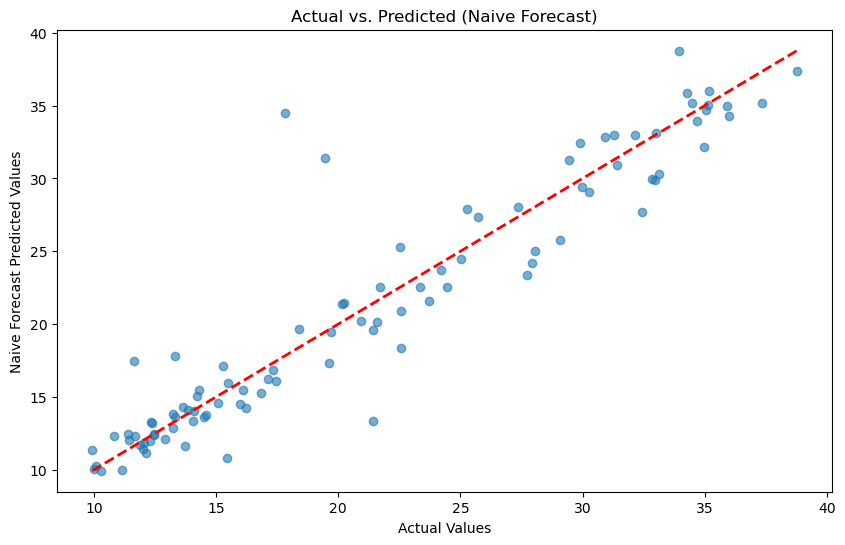

In [2]:
import matplotlib.pyplot as plt

# Actual vs. Predicted scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(actual_values, naive_forecast, alpha=0.6)
plt.plot([min(actual_values), max(actual_values)], [min(actual_values), max(actual_values)], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Naive Forecast Predicted Values')
plt.title('Actual vs. Predicted (Naive Forecast)')
plt.show()

## Forecasting the Next n (30) Days: Model Evaluation

In [3]:
# Forecast the next 30 days using the naive method
n_periods = 30  # Number of periods to forecast
last_value = oil_prices[-1]  # The last observed value
naive_forecast_next_30 = [last_value] * n_periods  # Repeat the last value for the forecast

# Display the naive forecast
print("Naive forecast for the next 30 days:")
print(naive_forecast_next_30)

Naive forecast for the next 30 days:
[21.6917598945216, 21.6917598945216, 21.6917598945216, 21.6917598945216, 21.6917598945216, 21.6917598945216, 21.6917598945216, 21.6917598945216, 21.6917598945216, 21.6917598945216, 21.6917598945216, 21.6917598945216, 21.6917598945216, 21.6917598945216, 21.6917598945216, 21.6917598945216, 21.6917598945216, 21.6917598945216, 21.6917598945216, 21.6917598945216, 21.6917598945216, 21.6917598945216, 21.6917598945216, 21.6917598945216, 21.6917598945216, 21.6917598945216, 21.6917598945216, 21.6917598945216, 21.6917598945216, 21.6917598945216]


## Forecasting the Next 30 Days: Actual vs. Predicted for the Naive Forecast

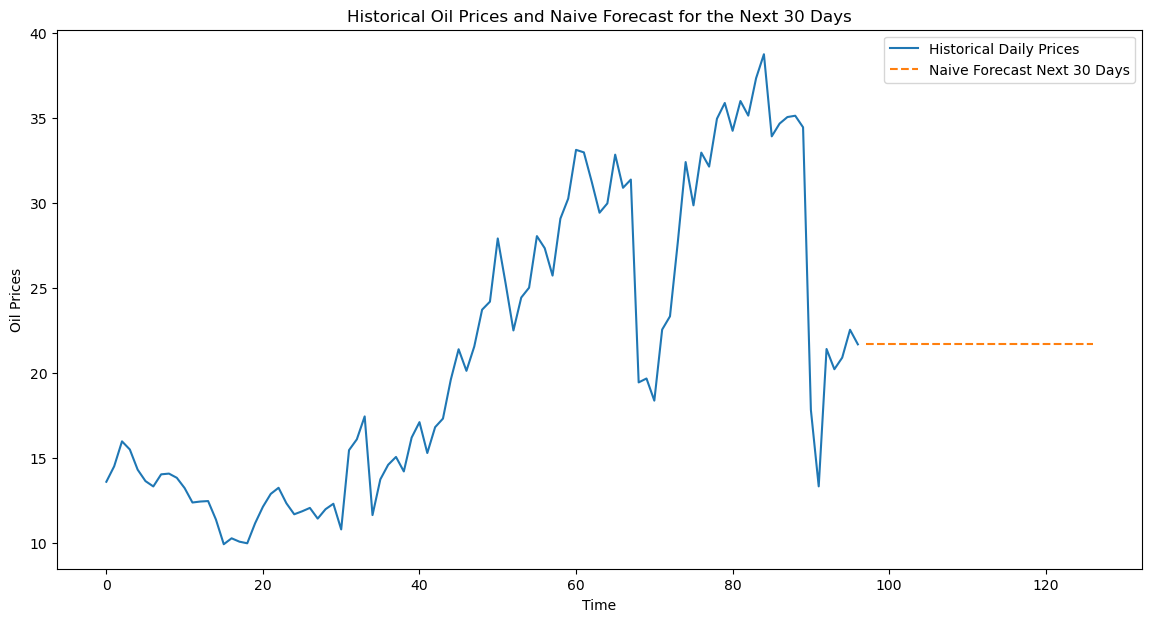

In [4]:
# Plot the historical data
plt.figure(figsize=(14, 7))
plt.plot(df.index[-100:], oil_prices[-100:], label='Historical Daily Prices')  # Plot the last 100 days for context

# Plot the naive forecast
forecast_index = list(range(len(oil_prices), len(oil_prices) + n_periods))  # Create an index for the forecast
plt.plot(forecast_index, naive_forecast_next_30, label='Naive Forecast Next 30 Days', linestyle='--')

plt.xlabel('Time')
plt.ylabel('Oil Prices')
plt.title('Historical Oil Prices and Naive Forecast for the Next 30 Days')
plt.legend()
plt.show()